<a href="https://colab.research.google.com/github/slehmadi/tugasKakakCoba2/blob/main/coba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from google.colab import drive
#drive.mount("/content/gdrive")
#root_path = "/content/gdrive/MyDrive/Datasets/"
#data = pd.read_csv(root_path+"/linear_regression.csv")
data = pd.read_csv("/content/sample_data/linear_regression.csv")
data

,x,y
0,0.58705,5.79555
1,-0.15098,3.53372
2,-0.24805,3.22805
3,-0.36056,2.87947
4,0.09375,4.40297
...,...,...
95,0.57697,5.62490
96,0.54242,5.50030
97,-0.02820,3.96986
98,-0.52083,2.46482


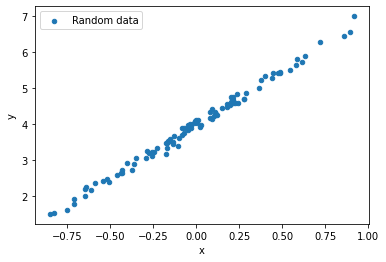

In [ ]:
# No. 1 - Visualisasi Scatterplot data
data.plot(kind="scatter", x="x", y="y", label="Random data")
plt.legend()
plt.show()

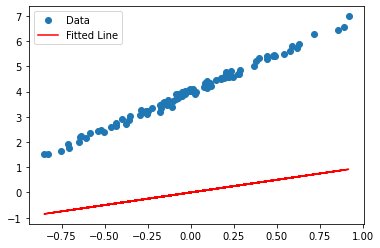

In [ ]:
# No. 2 - Menghitung regresi menggunakan metode inverse matriks

matrixData = np.array(data)
matrixDataTranspose = np.array(data.transpose())

calcMatrix = np.matmul(matrixDataTranspose, matrixData)
calcMatrixInverse = np.linalg.inv(calcMatrix)
m = np.matmul(calcMatrixInverse, matrixDataTranspose)
coefReg = np.matmul(m, data['y'])

plt.plot(data['x'], data['y'], 'o', label="Data")
plt.plot(data['x'], data['x']*coefReg[1] + coefReg[0], 'r', label="Fitted Line")
plt.legend()
plt.show()

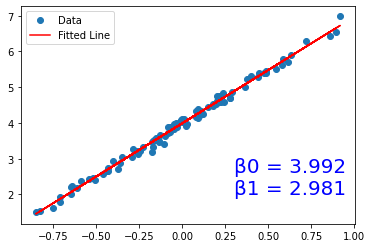

In [ ]:
# No. 3 - Menghitung regresi dengan np.linalg.lstsq
dataX = np.array(data['x'])
dataY = np.array(data['y'])

# y = mx + c -> y = Ap dimana A = [[x 1]] dan p = [[m], [c]] juga x = dataX dan y = dataY

A = np.vstack([dataX, np.ones(len(dataX))]).T

m, c = np.linalg.lstsq(A, dataY, rcond=None)[0]

# Visualisasi
plt.plot(dataX, dataY, 'o', label='Data')
plt.plot(dataX, m*dataX + c, 'r', label="Fitted Line")
plt.legend()
plt.text(0.3, 2, s="β0 = "+str(float("%.3f" %c))+"\nβ1 = "+str(float("%.3f" %m)), color="blue", size=20)
plt.show()
print()